## Краевая задача для ОДУ


Цыбулин Иван ([tsybulin@crec.mipt.ru](mailto:tsybulin@crec.mipt.ru))

### Линейная краевая задача для ОДУ

$$\begin{aligned}
\frac{d\mathbf y(x)}{dx} &= \mathbf A(x) \mathbf y(x) + \mathbf f(x), \qquad x \in [a, b]\\
&\ell_i^\top \mathbf y(a) = \alpha_i, \quad i = 1,\dots,r\\
&\ell_i^\top \mathbf y(b) = \alpha_i, \quad i = r+1,\dots,n
\end{aligned}
$$

### Построение фундаментальной системы
Решение ОДУ зависит от $n$ констант, причем в линейном случае можно записать
$$
\mathbf y(x) = \mathbf y_0(x) + \sum_{i=1}^n C_i \mathbf y_i(x),
$$
где $\mathbf y_0(x)$ &mdash; частное решение ОДУ, $\mathbf y_i(x)$ &mdash; линейно независимые решения однородного уравнения
$$
\frac{d\mathbf y(x)}{dx} = \mathbf A(x) \mathbf y(x), \qquad x \in [a, b]
$$

Фундаментальную систему можно построить численно. Для этого можно найти каждое $\mathbf y_i(x)$, сформулировав для нее подходящую задачу Коши. Например,

$$
\begin{cases}
\dfrac{d\mathbf y_0(x)}{dx} &= \mathbf A(x) \mathbf y_0(x) + \mathbf f(x)\\
\mathbf y_0(a) &= \mathbf 0
\end{cases}
\qquad
\begin{cases}
\dfrac{d\mathbf y_i(x)}{dx} &= \mathbf A(x) \mathbf y_i(x)\\
\mathbf y_i(a) &= \mathbf e_i
\end{cases}
$$

### Решение краевой задачи
После нахождения фундаментральной системы, решение краевой задачи сводится к разрешению краевых условий относительно $C_i$:

$$\begin{aligned}
&\ell_i^\top \left[\mathbf y_0(a) + \sum_{i=1}^n C_i \mathbf y_i(a)\right] = \alpha_i, \quad i = 1,\dots,r\\
&\ell_i^\top \left[\mathbf y_0(b) + \sum_{i=1}^n C_i \mathbf y_i(b)\right] = \alpha_i, \quad i = r+1,\dots,n
\end{aligned}
$$
Это линейная система из $n$ уравнений для $n$ неизвестных $C_i$.

Решим численно систему
$$
\begin{aligned}
u'(x) &= v(x)\\
v'(x) &= (1-x^2) u(x) + e^{-x}\\
u(0) = 1,&\qquad u(2) + v(2) = 0
\end{aligned}
$$

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def rk4(f, tau, t, u):
    k1 = f(t, u)
    k2 = f(t + tau/2, u + tau/2*k1)
    k3 = f(t + tau/2, u + tau/2*k2)
    k4 = f(t + tau  , u + tau  *k3)
    return u + tau * (k1 + 2*k2 + 2*k3 + k4) / 6
rk4.order = 4; rk4.name = 'Классический метод РК 4 порядка'

def fixed_stepsize(f, y0, tmax, method, tau=0.1, verbose=False):
    t = 0; u = y0
    T = [0]; Y = [y0]
    name = method.name
    while t < tmax:
        # Если последний шаг выхдит за tmax - уменьшаем tau
        if t + tau > tmax: tau = tmax - t
        u = method(f, tau, t, u)
        t += tau;
        T.append(t)
        Y.append(u)
    if verbose:
        print('%s, всего шагов: %d'%(name, len(T)-1))
    return np.array(T), np.array(Y)

Классический метод РК 4 порядка, всего шагов: 200


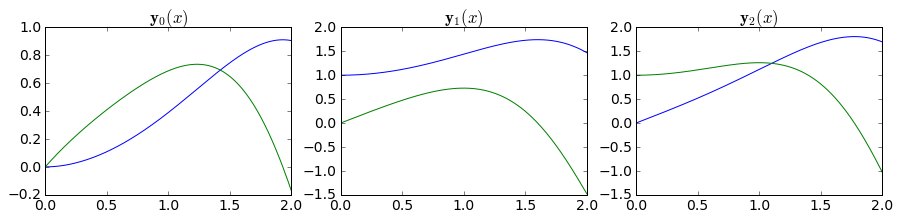

In [45]:
def G(x, y): # Правая часть неоднородной ОДУ
    u, v = y; return np.array([v, (1-x*x)*u + np.exp(-x)])
def Ghom(x, y): # Правая часть однородной ОДУ
    u, v = y; return np.array([v, (1-x*x)*u])
a = 0; b = 2
X, Y0 = fixed_stepsize(G   , np.array([0., 0.]), b, rk4, b / 200, verbose=True)
X, Y1 = fixed_stepsize(Ghom, np.array([1., 0.]), b, rk4, b / 200)
X, Y2 = fixed_stepsize(Ghom, np.array([0., 1.]), b, rk4, b / 200)

plt.figure(figsize=(15, 3)); plt.rc('font', size=14)
plt.subplot(1, 3, 1); plt.plot(X, Y0); plt.title(r'${\bf y}_0(x)$')
plt.subplot(1, 3, 2); plt.plot(X, Y1); plt.title(r'${\bf y}_1(x)$')
plt.subplot(1, 3, 3); plt.plot(X, Y2); plt.title(r'${\bf y}_2(x)$')
plt.show()

C1 = 1.000000, C2 = -1.082561


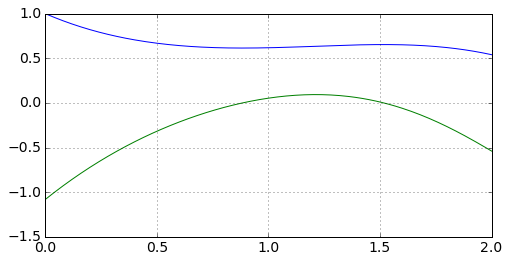

In [43]:
# Теперь можно разрешить условия u(0) = 1, u(2) + v(2) = 0
# (u(x),v(x)) = Y0(x) + C1 Y1(x) + C2 Y2(x)

A = [[     Y1[0, 0],            Y2[0, 0]      ], # Левое условие
     [Y1[-1, 0]+Y1[-1, 1], Y2[-1, 0]+Y2[-1, 1]]] # Правое условие
b = np.array([1, 0]) - [Y0[0, 0], Y0[-1, 0]+Y0[-1, 1]]
C1, C2 = np.linalg.solve(A, b)
print('C1 = %f, C2 = %f' % (C1, C2))
plt.figure(figsize=(8, 4)); plt.plot(X, Y0 + C1*Y1 + C2*Y2); plt.grid()

### Задача XI.8.1
Построить общее решение для 
* $y''(x) + (10+x) y(x) = xe^{-x}, \quad x \in [0, 10]$
* $y''(x) - (10+x) y(x) = xe^{-x}, \quad x \in [0, 10]$

Классический метод РК 4 порядка, всего шагов: 200


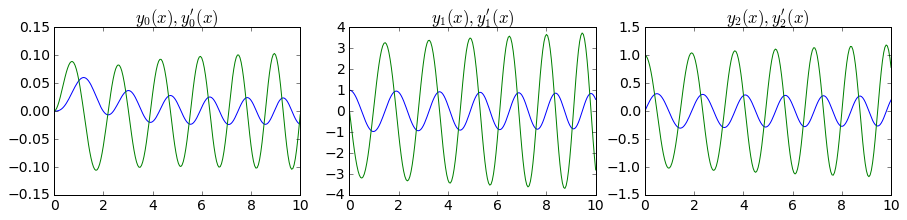

In [80]:
def G(x, y): # Правая часть неоднородной ОДУ
    u, v = y; return np.array([v, -(10+x)*u + x*np.exp(-x)])
def Ghom(x, y): # Правая часть однородной ОДУ
    u, v = y; return np.array([v, -(10+x)*u])

a = 0; b = 10
X, Y0 = fixed_stepsize(G   , np.array([0., 0.]), b, rk4, b / 200, verbose=True)
X, Y1 = fixed_stepsize(Ghom, np.array([1., 0.]), b, rk4, b / 200)
X, Y2 = fixed_stepsize(Ghom, np.array([0., 1.]), b, rk4, b / 200)

plt.figure(figsize=(15, 3)); plt.rc('font', size=14)
plt.subplot(1, 3, 1); plt.plot(X, Y0); plt.title(r'$y_0(x), y_0^\prime(x)$')
plt.subplot(1, 3, 2); plt.plot(X, Y1); plt.title(r'$y_1(x), y_1^\prime(x)$')
plt.subplot(1, 3, 3); plt.plot(X, Y2); plt.title(r'$y_2(x), y_2^\prime(x)$')
plt.show()

Классический метод РК 4 порядка, всего шагов: 200


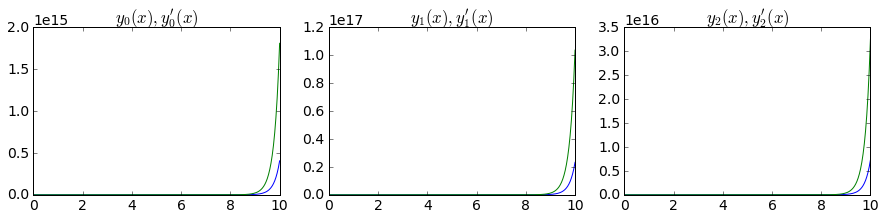

In [105]:
def G(x, y): # Правая часть неоднородной ОДУ
    u, v = y; return np.array([v, (10+x)*u + x*np.exp(-x)])
def Ghom(x, y): # Правая часть однородной ОДУ
    u, v = y; return np.array([v, (10+x)*u])

a = 0; b = 10
X, Z0 = fixed_stepsize(G   , np.array([0., 0.]), b, rk4, b / 200, verbose=True)
X, Z1 = fixed_stepsize(Ghom, np.array([1., 0.]), b, rk4, b / 200)
X, Z2 = fixed_stepsize(Ghom, np.array([0., 1.]), b, rk4, b / 200)

plt.figure(figsize=(15, 3)); plt.rc('font', size=14)
plt.subplot(1, 3, 1); plt.plot(X, Z0); plt.title(r'$y_0(x), y_0^\prime(x)$')
plt.subplot(1, 3, 2); plt.plot(X, Z1); plt.title(r'$y_1(x), y_1^\prime(x)$')
plt.subplot(1, 3, 3); plt.plot(X, Z2); plt.title(r'$y_2(x), y_2^\prime(x)$')
plt.show()

Мы численно построили для каждой задачи фундаментальную систему в форме
$$
y(x) = y_0(x) + C_1 y_1(x) + C_2 y_2(x).
$$
Но можно ли использовать эту систему для решения краевой задачи? Пусть граничные условия заданы в виде
$$
y(a) = \alpha, \; y(b) = \beta
$$
Матрица системы для определения $C_1, C_2$ будет иметь вид
$$
A = \begin{pmatrix}
y_1(a) & y_2(a)\\
y_1(b) & y_2(b)
\end{pmatrix}
$$

In [106]:
def cond(A):
    lam = np.sqrt(np.linalg.eigvalsh(A.T * A))
    return lam[-1] / lam[0]

A = np.array([[Y1[0, 0], Y2[0, 0]], [Y1[-1, 0], Y2[-1, 0]]]) 
print('Для колебательных решений cond(A) =', cond(A))

A = np.array([[Z1[0, 0], Z2[0, 0]], [Z1[-1, 0], Z2[-1, 0]]]) 
print('Для экспоненциальных решений cond(A) =', cond(A))

Для колебательных решений cond(A) = 5.01011683375
Для экспоненциальных решений cond(A) = 7.29850742218e+15


Видно, что во втором случае система для определения $C_1, C_2$ очень плохо определена, а значит $C_1, C_2$ будут найдены с большими ошибками, что в свою очередь приведет к большим ошибкам в итоговом решении, вычисляемом по формуле
$$
y(x) = y_0(x) + C_1 y_1(x) + C_2 y_2(x)
$$

C1 = 2.000000, C2 = -6.429219


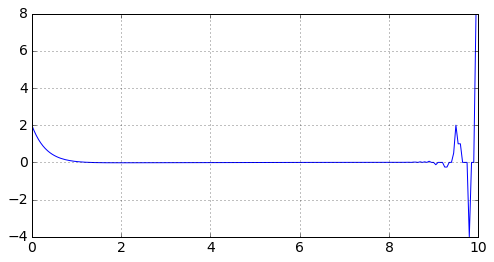

In [107]:
A = np.array([[Z1[0, 0], Z2[0, 0]], [Z1[-1, 0], Z2[-1, 0]]])
b = np.array([2-Z0[0, 0], 3-Z0[-1, 0]])
C1, C2 = np.linalg.solve(A, b)
print('C1 = %f, C2 = %f' % (C1, C2))
plt.figure(figsize=(8, 4)); plt.plot(X, Z0[:, 0] + C1*Z1[:, 0] + C2*Z2[:, 0])
plt.grid()

Для краевых задач для уравнений второго порядка в форме
$$
\frac{d}{dx}\left[
p(x) \frac{dy}{dx}
\right] + 
r(x) \frac{dy}{dx} - q(x) y(x) = f(x)
$$
можно вопользоваться другим методом &mdash; методом прогонки (конечно-разностным методом). Для этого уравнение аппроксимируется на равномерной сетке на отрезке $[a,b]$.

$$
\frac{p_{m+1/2}(y_{m+1} - y_m) - p_{m-1/2} (y_m - y_{m-1})}{h^2}
+ r_m \frac{y_{m+1} - y_{m-1}}{2h} - q_m y_m = f_m,\\
p_{m+1/2} \equiv p\left(\frac{x_m + x_{m+1}}{2}\right), \quad
q_m \equiv q(x_m), \quad r_m \equiv r(x_m), \quad f_m \equiv f(x_m)
$$

![stencil](stencil.png)

Такая аппроксимация уравнения имеет второй порядок и обладает преимуществами перед аппроксимацией 
$$
\frac{d}{dx}\left[
p(x) \frac{dy}{dx}
\right] = \frac{dp}{dx} \frac{dy}{dx} + p(x) \frac{d^2y}{dx^2} 
\sim \frac{p_{m+1} - p_{m-1}}{2h}\frac{y_{m+1} - y_{m-1}}{2h} + p_m \frac{y_{m+1} -2y_m + y_{m-1}}{h^2}.
$$

Граничные условия первого рода $y(a) = \alpha, y(b) = \beta$ аппроксимируются в разностной задаче тривиально:
$$
y_0 = \alpha, \qquad y_M = \beta.
$$
Для условий с производными
$$
p(a) y'(a) + \sigma y(a) = \gamma\\
p(b) y'(b) + \rho y(a) = \delta
$$
аппроксимация на границе со вторым порядком производится сложнее.

Рассмотрим левое условие $p(a) y'(a) + \sigma y(a) = \gamma$. Проинтегрируем уравнение
$$
\frac{d}{dx}\left[
p(x) \frac{dy}{dx}
\right] + 
r(x) \frac{dy}{dx} - q(x) y(x) = f(x)
$$
на отрезке $[a, a+h]$, предварительно умножив на $\phi(x) = 1 - \frac{x-a}{h}$. 
$$
0 = \int_a^{a+h}
\left[\frac{d}{dx}\left(
p(x) \frac{dy}{dx}
\right) + 
r(x) \frac{dy}{dx} - q(x) y(x) - f(x)
\right] \phi(x) dx = \\ =
-p(a) y'(a) +\int_a^{a+h} \left(r(x) \phi(x) -p(x) \frac{d\phi}{dx}\right) \frac{dy}{dx} dx
-\int_a^{a+h} (q(x) y(x) + f(x)) \phi(x) dx =
$$
Приближая первый интеграл по формуле средней точки, а второй по формуле трапеций, получим
$$
= -p(a) y'(a) + \left(\frac{r_{1/2}}{2} + \frac{p_{1/2}}{h}\right) \frac{y_1 - y_0}{h}
-\frac{h}{2} (q_0 y_0 + f_0) + O(h^2).
$$

Таким образом,
$$
p(a) y'(a) = \left(\frac{r_{1/2}}{2} + \frac{p_{1/2}}{h}\right) \frac{y_1 - y_0}{h}
-\frac{h}{2} (q_0 y_0 + f_0) + O(h^2).
$$
Требуемая аппроксимация граничного условия
$$p(a) y'(a) + \sigma y(a) = \gamma$$
принимает вид
$$
\left(\frac{r_{1/2}}{2} + \frac{p_{1/2}}{h}\right) \frac{y_1 - y_0}{h}
-\frac{h}{2} (q_0 y_0 + f_0) + \sigma y_0 = \gamma
$$

Возвращаясь к задаче XI.7.1, построим фундаментальное решение
$$y''(x) - (10+x) y(x) = xe^{-x}, \quad x \in [0, 10]$$
как линейную комбинацию
$$
y(x) = y_0(x) + C_1 y_1(x) + C_2 y_2(x),
$$
где $y_i$ получаются не из решение задачи Коши, а из решения *краевых задач* методом прогонки.
$$
\begin{cases}
y_0''(x) - (10+x)y_0(x) = xe^{-x}\\
y_0(0) = 0\\
y_0(10) = 0
\end{cases}
\quad
\begin{cases}
y_1''(x) - (10+x)y_1(x) = 0\\
y_1(0) = 0\\
y_1(10) = 1
\end{cases}
\quad
\begin{cases}
y_2''(x) - (10+x)y_2(x) = 0\\
y_2(0) = 1\\
y_2(10) = 0
\end{cases}
$$

In [111]:
from scipy.linalg import solve_banded

M = 200; X = np.linspace(0, 10, M+1)
def sweep_solve(x, alpha, beta, rhs):
    h = x[1] - x[0]; M = len(x) - 1
    A = np.zeros((3, M+1)); b = np.zeros(M+1)
    
    # Заполняем строки трехдиагональной системы с 1 до M-1
    A[0, 2:] = A[2, :-2] = 1/h**2
    A[1, 1:M] = -2/h**2 - (10 + x[1:M])
    b[1:M] = rhs[1:M]
    
    # Первая и последняя строки содержат граничные условия
    A[0, 1] = A[2, -1] = 0
    A[1, 0] = A[1, M] = 1
    b[0] = alpha; b[M] = beta;
    return solve_banded((1, 1), A, b)

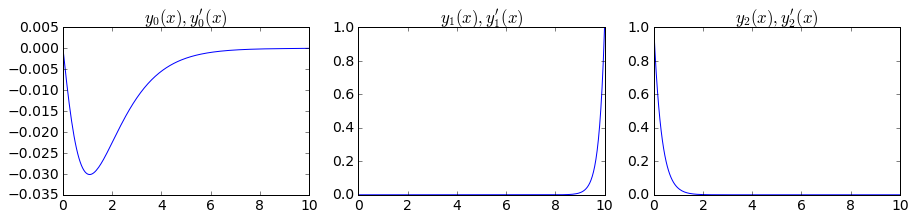

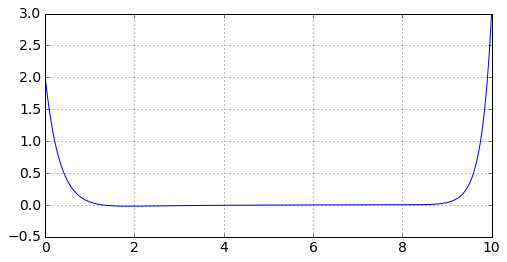

In [112]:
Z0 = sweep_solve(X, 0, 0, X*np.exp(-X))
Z1 = sweep_solve(X, 0, 1, np.zeros_like(X))
Z2 = sweep_solve(X, 1, 0, np.zeros_like(X))

plt.figure(figsize=(15, 3)); plt.rc('font', size=14)
plt.subplot(1, 3, 1); plt.plot(X, Z0); plt.title(r'$y_0(x), y_0^\prime(x)$')
plt.subplot(1, 3, 2); plt.plot(X, Z1); plt.title(r'$y_1(x), y_1^\prime(x)$')
plt.subplot(1, 3, 3); plt.plot(X, Z2); plt.title(r'$y_2(x), y_2^\prime(x)$')
plt.show()
plt.figure(figsize=(8, 4)); plt.plot(X, Z0 + 3*Z1 + 2*Z2)
plt.grid()

### Нелинейная краевая задача. Метод стрельбы
Рассмотрим нелинейную краевую задачу второго порядка
$$
y''(x) = f(x, y(x), y'(x)), \qquad x \in [a,b]\\
y(a) = \alpha\\
y(b) = \beta
$$

Для нелинейных задач не существует понятия фундаментальной системы, так как решение больше не представляется *линейной* комбинацией.

Рассмотрим вспомогательную задачу Коши
$$
y''(x) = f(x, y(x), y'(x)), \qquad x \in [a,b]\\
y(a) = \alpha\\
y'(a) = p.
$$
Здесь $p$ &mdash; параметр. При некотором его значении решение задачи Коши совпадает с решением исходной краевой задачи. При каждом значении параметра $p$ задача может быть легко решена численно.

Рассмотрим на примере
$$
y'' = \sin y, \quad x \in [0, \pi/2]\\
y(0) = 0\\
y(\pi/2) = 1
$$

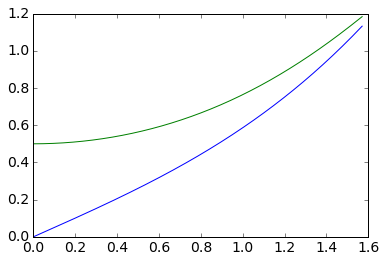

In [124]:
def G(x, Y): # Правая часть для задачи Коши
    y, yp = Y
    return np.array([yp, np.sin(y)])

def shoot_plot(p):
    b = np.pi/2
    X, Y = fixed_stepsize(G, np.array([0., p]), b, rk4, b / 200)
    plt.plot(X, Y)
    return

shoot_plot(0.5)

Значение решения на правом конце можно рассмотреть как функцию $p$. Мы умеем вычислять ее поточечно при каждом p.

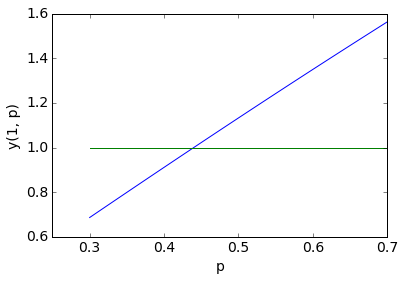

In [125]:
def shoot(p):
    b = np.pi/2
    X, Y = fixed_stepsize(G, np.array([0., p]), b, rk4, b / 200)
    return Y[-1, 0]

val = []; P = np.linspace(0.3, 0.7, 100)
for p in P:
    val.append(shoot(p))
    
plt.plot(P, val); plt.plot(P, np.ones_like(P)); 
plt.xlabel('p')
plt.ylabel(r'y(1, p)')

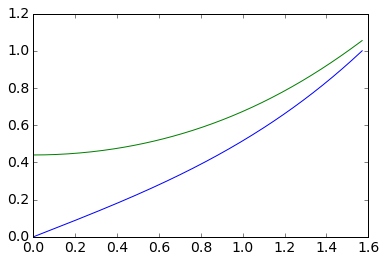

In [127]:
from scipy.optimize import fsolve

ptrue = fsolve(lambda p: shoot(p) - 1, 0.5)
shoot_plot(ptrue)